Problem 1:
1. **TRUE**. The solution of the stochastic integral ∫₀ᵀ μ dWₜ is indeed μ(Wₜ - W₀) and is a random variable.

2. **FALSE**. The variance of a Wiener process with scale coefficient σ = 1 at time t is t, not t². For a standard Wiener process, Var(W(t)) = t.

3. **FALSE**. The standard Drift-Diffusion Model (DDM) assumes that evidence accumulates continuously over time, not in discrete chunks. It models evidence accumulation as a continuous-time stochastic process.

4. **FALSE**. The first passage time distribution for the DDM (assuming the specific case of the Wiener process with drift) does have a closed-form probability density function (the inverse Gaussian distribution), and it can be evaluated analytically.

5. **FALSE**. The Euler-Maruyama method is a numerical technique that can be used to simulate both linear and nonlinear stochastic differential equations.

6. **FALSE**. It's not always true that the prior will have smaller variance than the posterior. In many cases, the posterior variance is smaller than the prior variance as data provides information, but this depends on the specific problem and data. There are scenarios where the posterior variance can be larger.

7. **TRUE**. Experimental validation is indeed crucial for ensuring construct validity in cognitive models.

8. **FALSE**. MCMC methods don't approximate the posterior through a simpler distribution. Instead, they generate samples from the complex posterior distribution directly through a Markov chain process. The approximation comes from using these samples to estimate properties of the posterior.

9. **TRUE**. As more data is collected, the influence of the prior generally diminishes in Bayesian inference.

10. **TRUE**. The effective sample size (ESS) differs from the total number of samples in MCMC because of autocorrelation between consecutive samples.

The FALSE statements are: 2, 3, 4, 5, 6, and 8.

Problem 2:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def ddm(mu: float, alpha: float, beta: float, sigma: float):
  accumulator = alpha * beta
  time = 0
  dt = 1e-3
  while accumulator < alpha and accumulator > 0 and time < 10:
    accumulator += mu * dt + np.random.normal(0, sigma * np.sqrt(dt))
    time += dt

  if time >= 10:
    print("Timed Out")

  return (time, accumulator >= alpha)


def vary_drift(alpha: float, beta: float, sigma: float):
  upper_means = np.zeros(25)
  upper_stds = np.zeros(25)

  lower_means = np.zeros(25)
  lower_stds = np.zeros(25)

  mus = np.zeros(25)

  for i in range(25):
    # vary mu from -2.5 - 2.5
    mus[i] = (i / 5) - 2.5
    rts = np.zeros((2000, 2))
    for j in range(2000):
      rts[j] = ddm(mus[i], alpha, beta, sigma)
    
    upper_means[i] = np.mean(rts[rts[:, 1] == 1, 0])
    upper_stds[i] = np.std(rts[rts[:, 1] == 1, 0])

    lower_means[i] = np.mean(rts[rts[:, 1] == 0, 0])
    lower_stds[i] = np.std(rts[rts[:, 1] == 0, 0])

  return mus, upper_means, upper_stds, lower_means, lower_stds


def plot_results(x, x_label, upper_mean, upper_std, lower_mean, lower_std):

  f = plt.figure(figsize=(20, 5))

  ax = f.add_subplot(1, 3, 1)

  ax.scatter(x, upper_mean, color='g', alpha=0.3)
  ax.scatter(x, lower_mean, color='r', alpha=0.3)

  plt.title(x_label + ' vs Mean')
  plt.xlabel(x_label)
  plt.ylabel('Mean RT')


  ax = f.add_subplot(1, 3, 2)

  ax.axhline(0, color='black', alpha=0.55)
  ax.scatter(x, upper_mean - lower_mean)

  plt.title('Difference of Means')
  plt.xlabel(x_label)
  plt.ylabel('Affirm RT - Deny RT')


  ax = f.add_subplot(1, 3, 3)

  plt.title(x_label + ' vs Standard Deviation')
  ax.scatter(x, upper_std, color='g', alpha=0.3)
  ax.scatter(x, lower_std, color='r', alpha=0.3)

  plt.xlabel(x_label)
  plt.ylabel('STD RT')

  plt.legend()

In [183]:
alpha = 1.0
beta = 0.5
sigma = 1.0
drift, upper_mean, upper_std, lower_mean, lower_std = vary_drift(alpha, beta, sigma)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


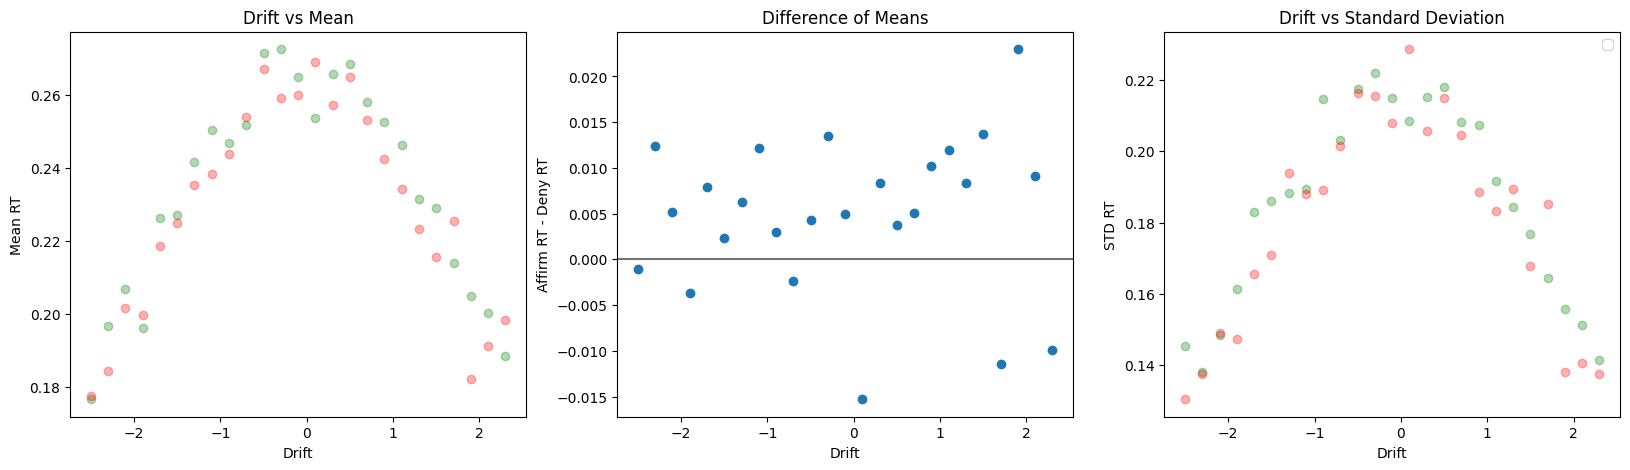

In [205]:
plot_results(drift, 'Drift', upper_mean, upper_std, lower_mean, lower_std)

Both the Means and Standard Deviations of both groups appear to be almost the same. They seem to follow a linear relationship where they are highest at 0 drift and lower as the absolute value of drift increases. This makes sense as when drift's value increases, there is a larger trend towards the upper threshold. The steeper slope created by this trend meets the upper threshold sooner as the drift increases. The ones making it to the lower threshold also have a faster reaction time as any which go for longer will trend towards the upper threshold.

In [223]:
def vary_alpha(mu: float, beta: float, sigma: float):
  upper_means = np.zeros(25)
  upper_stds = np.zeros(25)

  lower_means = np.zeros(25)
  lower_stds = np.zeros(25)

  alphas = np.zeros(25)

  for i in range(25):
    # vary alpha from 1 - 2.25
    alphas[i] = 1 + (i / 20)
    rts = np.zeros((2000, 2))
    for j in range(2000):
      rts[j] = ddm(mu, alphas[i], beta, sigma)
    
    upper_means[i] = np.mean(rts[rts[:, 1] == 1, 0])
    upper_stds[i] = np.std(rts[rts[:, 1] == 1, 0])

    lower_means[i] = np.mean(rts[rts[:, 1] == 0, 0])
    lower_stds[i] = np.std(rts[rts[:, 1] == 0, 0])

  return alphas, upper_means, upper_stds, lower_means, lower_stds

In [224]:
mu = 0.0
beta = 0.5
sigma = 1.0
alpha, upper_mean, upper_std, lower_mean, lower_std = vary_alpha(mu, beta, sigma)

Timed Out


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


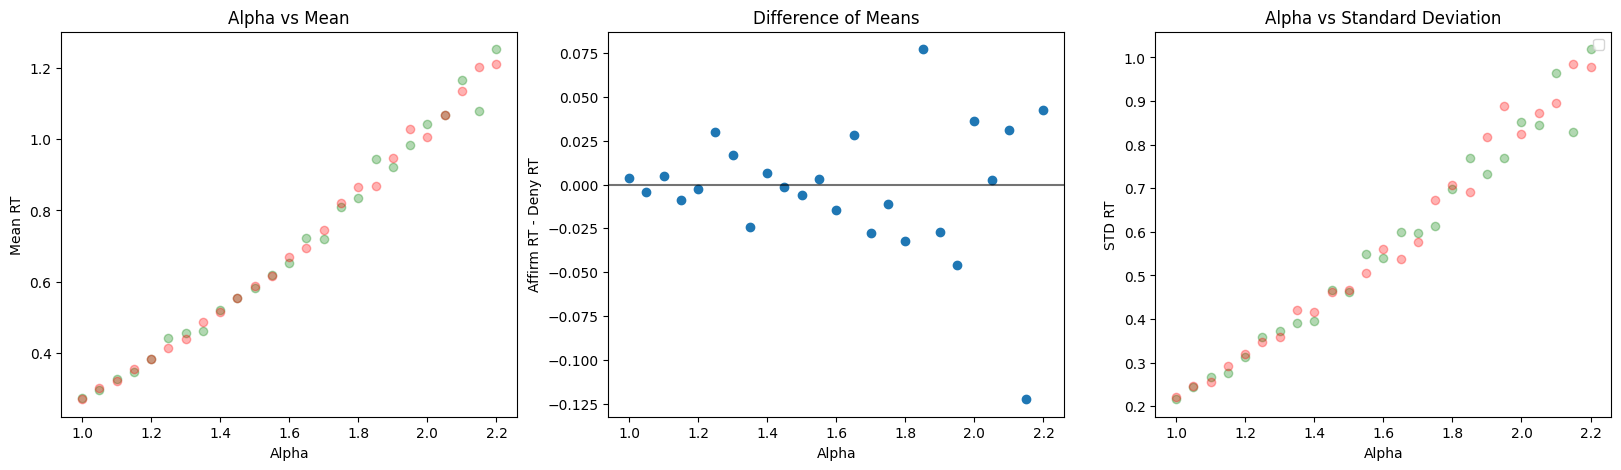

In [225]:
plot_results(alpha, 'Alpha', upper_mean, upper_std, lower_mean, lower_std)

As alpha, the theshold, varies from 1 to 2.25, the mean and standard deviation both increase. This is because there is more space for the accumulator to randomly move up and down as the drift was set to be 0 creating a random walk.

In [226]:
def vary_beta(mu: float, alpha: float, sigma: float):
  upper_means = np.zeros(25)
  upper_stds = np.zeros(25)

  lower_means = np.zeros(25)
  lower_stds = np.zeros(25)

  betas = np.zeros(25)

  for i in range(25):
    # vary beta from 0.1 - 0.9
    betas[i] = 0.1 + (i / 25) * 0.8
    rts = np.zeros((2000, 2))
    for j in range(2000):
      rts[j] = ddm(mu, alpha, betas[i], sigma)
    
    upper_means[i] = np.mean(rts[rts[:, 1] == 1, 0])
    upper_stds[i] = np.std(rts[rts[:, 1] == 1, 0])

    lower_means[i] = np.mean(rts[rts[:, 1] == 0, 0])
    lower_stds[i] = np.std(rts[rts[:, 1] == 0, 0])

  return betas, upper_means, upper_stds, lower_means, lower_stds

In [227]:
mu = 0.0
alpha = 1.0
sigma = 1.0
beta, upper_mean, upper_std, lower_mean, lower_std = vary_beta(mu, alpha, sigma)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


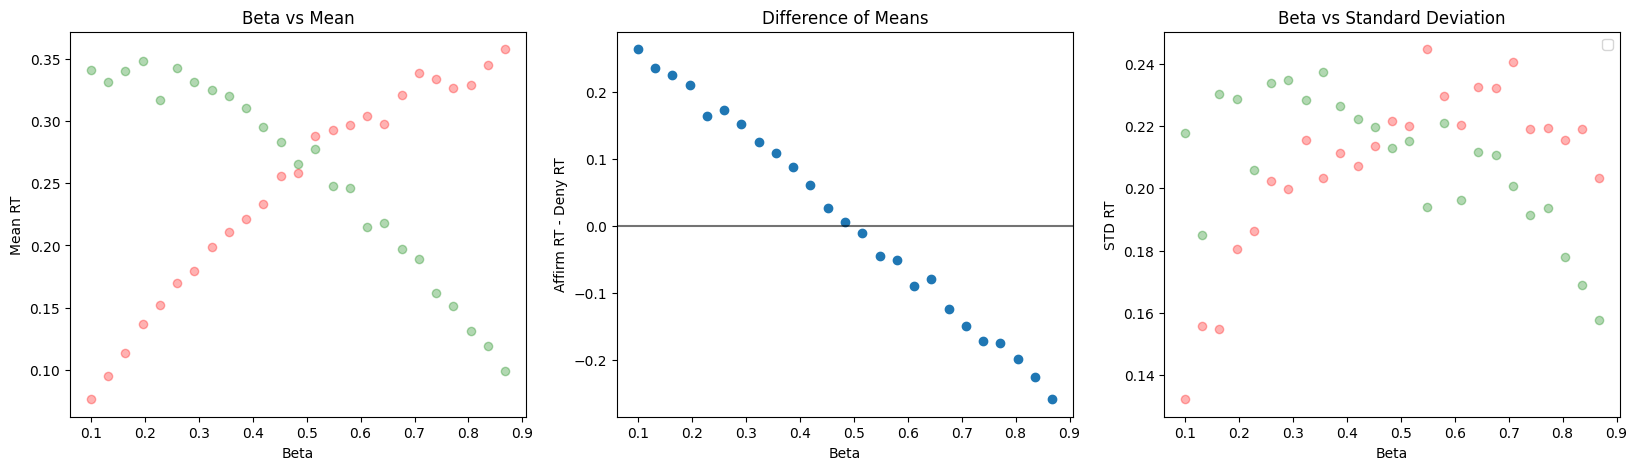

In [228]:
plot_results(beta, 'Beta', upper_mean, upper_std, lower_mean, lower_std)

As beta, the relative starting evidence, is varied from 0.1 to 0.9 the mean RT of the upper threshold lowers while the mean of the lower threshold increases. This represents the change in starting position as a higher beta means less evidence is needed to reach the upper threshold.

In [239]:
def vary_sigma(mu: float, alpha: float, beta: float):
  upper_means = np.zeros(25)
  upper_stds = np.zeros(25)

  lower_means = np.zeros(25)
  lower_stds = np.zeros(25)

  sigmas = np.zeros(25)

  for i in range(25):
    # vary sigma from 1.0 to 10
    sigmas[i] = 1 + (i / 25) * 9
    rts = np.zeros((2000, 2))
    for j in range(2000):
      rts[j] = ddm(mu, alpha, beta, sigmas[i])
    
    upper_means[i] = np.mean(rts[rts[:, 1] == 1, 0])
    upper_stds[i] = np.std(rts[rts[:, 1] == 1, 0])

    lower_means[i] = np.mean(rts[rts[:, 1] == 0, 0])
    lower_stds[i] = np.std(rts[rts[:, 1] == 0, 0])

  return sigmas, upper_means, upper_stds, lower_means, lower_stds

In [240]:
mu = 0.0
alpha = 1.0
beta = 0.5
sigma, upper_mean, upper_std, lower_mean, lower_std = vary_sigma(mu, alpha, beta)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


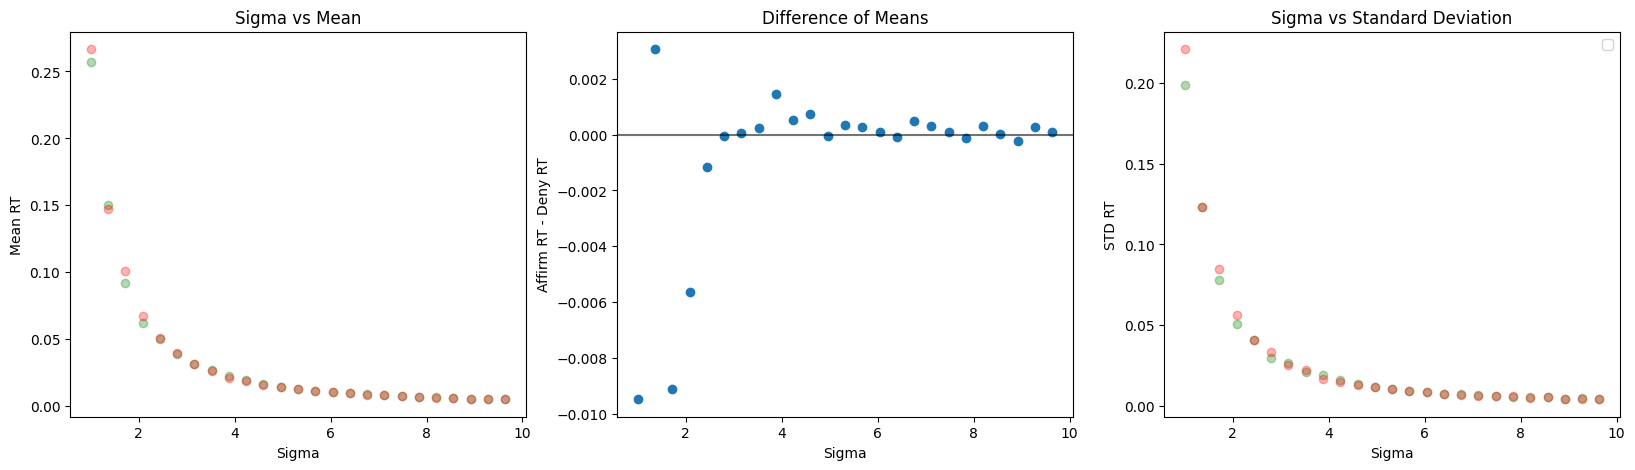

In [241]:
plot_results(sigma, 'Sigma', upper_mean, upper_std, lower_mean, lower_std)

As sigma, the scale, increases both means of RT decrease as well as their standard deviation. Sigma increases the step size leading to larger and larger steps which eventually lead to a single step reaching either the lower or upper threshold.

Problem 3:

Steps for proving that the identity Var[θ] = E[Var[θ|y]] + Var[E[θ|y]].

The identity is known as the Law of Total Variance (or variance decomposition formula).

Starting with the definition of variance:
Var[θ] = E[θ²] - (E[θ])²

For the first term, we use the Law of Total Expectation:
E[θ²] = E[E[θ²|y]]

For the second term, we already have E[θ].

Now, expand E[E[θ²|y]]:
E[E[θ²|y]] = E[Var[θ|y] + (E[θ|y])²]

This is because Var[θ|y] = E[θ²|y] - (E[θ|y])²
Rearranging: E[θ²|y] = Var[θ|y] + (E[θ|y])²

So we have:
E[E[θ²|y]] = E[Var[θ|y]] + E[(E[θ|y])²]

Now, back to the original variance formula:
Var[θ] = E[Var[θ|y]] + E[(E[θ|y])²] - (E[θ])²

We can further note that E[θ] = E[E[θ|y]] by the Law of Total Expectation.

The last two terms can be recognized as the variance of E[θ|y]:
Var[E[θ|y]] = E[(E[θ|y])²] - (E[E[θ|y]])² = E[(E[θ|y])²] - (E[θ])²

Therefore:
Var[θ] = E[Var[θ|y]] + Var[E[θ|y]]

This completes the proof, showing that the prior variance equals the expected posterior variance plus the variance of the posterior mean.

Problem 4:

The below models the shoe sizes of men in the US. This is known to be normally distributed with variance of 1. We take a 'sample' of 10 shoe sizes and try to use this to determine the true mean based off a prior. The prior is set to have a mean of 8 and is very confident (but wrong) so the variance is set to 0.1. The dotted line shows the naive approach of taking the mean of the sample and the histograms compare the prior and posterior distributions.

In [289]:
known_variance = 1

sample = [10, 9, 13.5, 9.5, 11, 8.5, 12, 12.5, 13, 13.5]

sample_mean = np.mean(sample)
print(sample_mean)
N = len(sample)

11.25


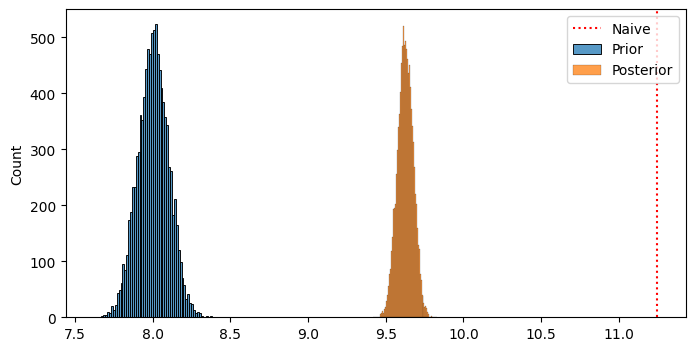

In [299]:
import seaborn as sns

prior_mean = 8
prior_variance = 0.1

f, ax = plt.subplots(1, 1, figsize=(8,4))

prior_samples = np.random.normal(prior_mean, prior_variance, size=10000)

updated_mean = 1 / ( (1 / prior_variance) + (N / known_variance) ) * ( (prior_mean / prior_variance) + (np.sum(sample) / known_variance) )
updated_variance = 1 / ( (1 / prior_variance) + (N / known_variance) )

post_samples = np.random.normal(updated_mean, updated_variance, size=10000)

sns.histplot(prior_samples, ax=ax, label='Prior')
sns.histplot(post_samples, ax=ax, label='Posterior')
ax.axvline(sample_mean, linestyle='dotted', label='Naive', color='red')

ax.legend()

Problem 5: Simple Bayesian Regression with Stan

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import stan
import arviz as az
import nest_asyncio

In [11]:
# Apply nest_asyncio to allow nested event loops (needed for Stan in notebooks)
nest_asyncio.apply()

# Set random seed for reproducibility
np.random.seed(123)

In [12]:
# Stan model definition
stan_code = """
data {
  int<lower=0> N;
  vector[N] x;
  vector[N] y;
}

parameters {
  real alpha;
  real beta;
  real<lower=0> sigma2;
}

model {
  // Priors
  sigma2 ~ inv_gamma(1, 1);
  alpha ~ normal(0, 10);
  beta ~ normal(0, 10);
  
  // Likelihood
  y ~ normal(alpha + beta * x, sqrt(sigma2));
}

generated quantities {
  vector[N] y_pred;
  for (n in 1:N)
    y_pred[n] = normal_rng(alpha + beta * x[n], sqrt(sigma2));
}
"""

In [13]:
# Simulate data function
def simulate_data(N, alpha, beta, sigma):
    x = np.random.normal(size=N)
    y = alpha + beta * x + sigma * np.random.normal(size=N)
    return x, y

# Simulation parameters
true_alpha = 2.3
true_beta = 4.0
true_sigma = 2.0

# First simulation with N=100
N = 100
x_100, y_100 = simulate_data(N, true_alpha, true_beta, true_sigma)

# Prepare data for Stan
data_dict_100 = {
    'N': N,
    'x': x_100,
    'y': y_100
}

# Compile and sample with Stan
model_100 = stan.build(stan_code, data=data_dict_100)
fit_100 = model_100.sample(num_chains=4, num_warmup=1000, num_samples=1000)

# Extract posterior samples as a DataFrame
df_100 = fit_100.to_frame()

# Calculate posterior statistics
posterior_summary_100 = az.summary(fit_100)
print("Summary for N=100:")
print(posterior_summary_100)

# Extract specific parameters for analysis
alpha_samples_100 = df_100['alpha'].values
beta_samples_100 = df_100['beta'].values
sigma2_samples_100 = df_100['sigma2'].values

# Calculate posterior means and credible intervals
alpha_mean_100 = np.mean(alpha_samples_100)
beta_mean_100 = np.mean(beta_samples_100)
sigma2_mean_100 = np.mean(sigma2_samples_100)

alpha_ci_100 = np.percentile(alpha_samples_100, [2.5, 97.5])
beta_ci_100 = np.percentile(beta_samples_100, [2.5, 97.5])
sigma2_ci_100 = np.percentile(sigma2_samples_100, [2.5, 97.5])

Building...

In file included from /home/spadezap/.local/lib/python3.10/site-packages/httpstan/include/tbb/concurrent_unordered_map.h:26,
                 from /home/spadezap/.local/lib/python3.10/site-packages/httpstan/include/stan/math/rev/core/profiling.hpp:10,
                 from /home/spadezap/.local/lib/python3.10/site-packages/httpstan/include/stan/math/rev/core.hpp:53,
                 from /home/spadezap/.local/lib/python3.10/site-packages/httpstan/include/stan/math/rev.hpp:10,
                 from /home/spadezap/.local/lib/python3.10/site-packages/httpstan/include/stan/math.hpp:19,
                 from /home/spadezap/.local/lib/python3.10/site-packages/httpstan/include/stan/model/model_header.hpp:4,
                 from /home/spadezap/.cache/httpstan/4.13.0/models/f5jehcga/model_f5jehcga.cpp:2:
/home/spadezap/.local/lib/python3.10/site-packages/httpstan/include/tbb/internal/_concurrent_unordered_impl.h: In instantiation of ‘void tbb::interface5::internal::concurrent_unordered_base<Tr


Building: 21.8s, done.Sampling:   0%
Sampling:  25% (2000/8000)
Sampling:  50% (4000/8000)
Sampling:  75% (6000/8000)
Sampling: 100% (8000/8000)
Sampling: 100% (8000/8000), done.
Messages received during sampling:
  Gradient evaluation took 2.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.25 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 3.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.31 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/tmp/httpstan_l0bkebjn/model_f5jehcga.stan', line 21, column 2 to column 45)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model 

Summary for N=100:
             mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha       2.268  0.196   1.924    2.648      0.003    0.002    3811.0   
beta        3.968  0.175   3.638    4.302      0.003    0.002    4005.0   
sigma2      3.861  0.548   2.928    4.946      0.009    0.006    4136.0   
y_pred[0]  -2.033  1.997  -5.838    1.601      0.032    0.023    3835.0   
y_pred[1]   6.208  1.979   2.381    9.962      0.033    0.023    3680.0   
...           ...    ...     ...      ...        ...      ...       ...   
y_pred[95]  6.345  1.955   2.671    9.979      0.032    0.022    3815.0   
y_pred[96] -2.051  2.005  -5.976    1.543      0.034    0.024    3390.0   
y_pred[97] -3.138  1.995  -6.814    0.652      0.032    0.023    3930.0   
y_pred[98]  3.792  1.991  -0.300    7.348      0.032    0.023    3827.0   
y_pred[99]  0.765  1.990  -2.951    4.501      0.032    0.023    3853.0   

            ess_tail  r_hat  
alpha         2541.0    1.0  
beta          3012.0


True values: alpha=2.3, beta=4.0, sigma^2=4.0
Posterior means (N=100): alpha=2.268, beta=3.968, sigma^2=3.861
95% CI for alpha: [1.895, 2.653]
95% CI for beta: [3.617, 4.311]
95% CI for sigma^2: [2.958, 5.081]


/home/spadezap/.local/lib/python3.10/site-packages/arviz/plots/traceplot.py:223: UserWarning: rcParams['plot.max_subplots'] (20) is smaller than the number of variables to plot (103), generating only 20 plots
  warnings.warn(


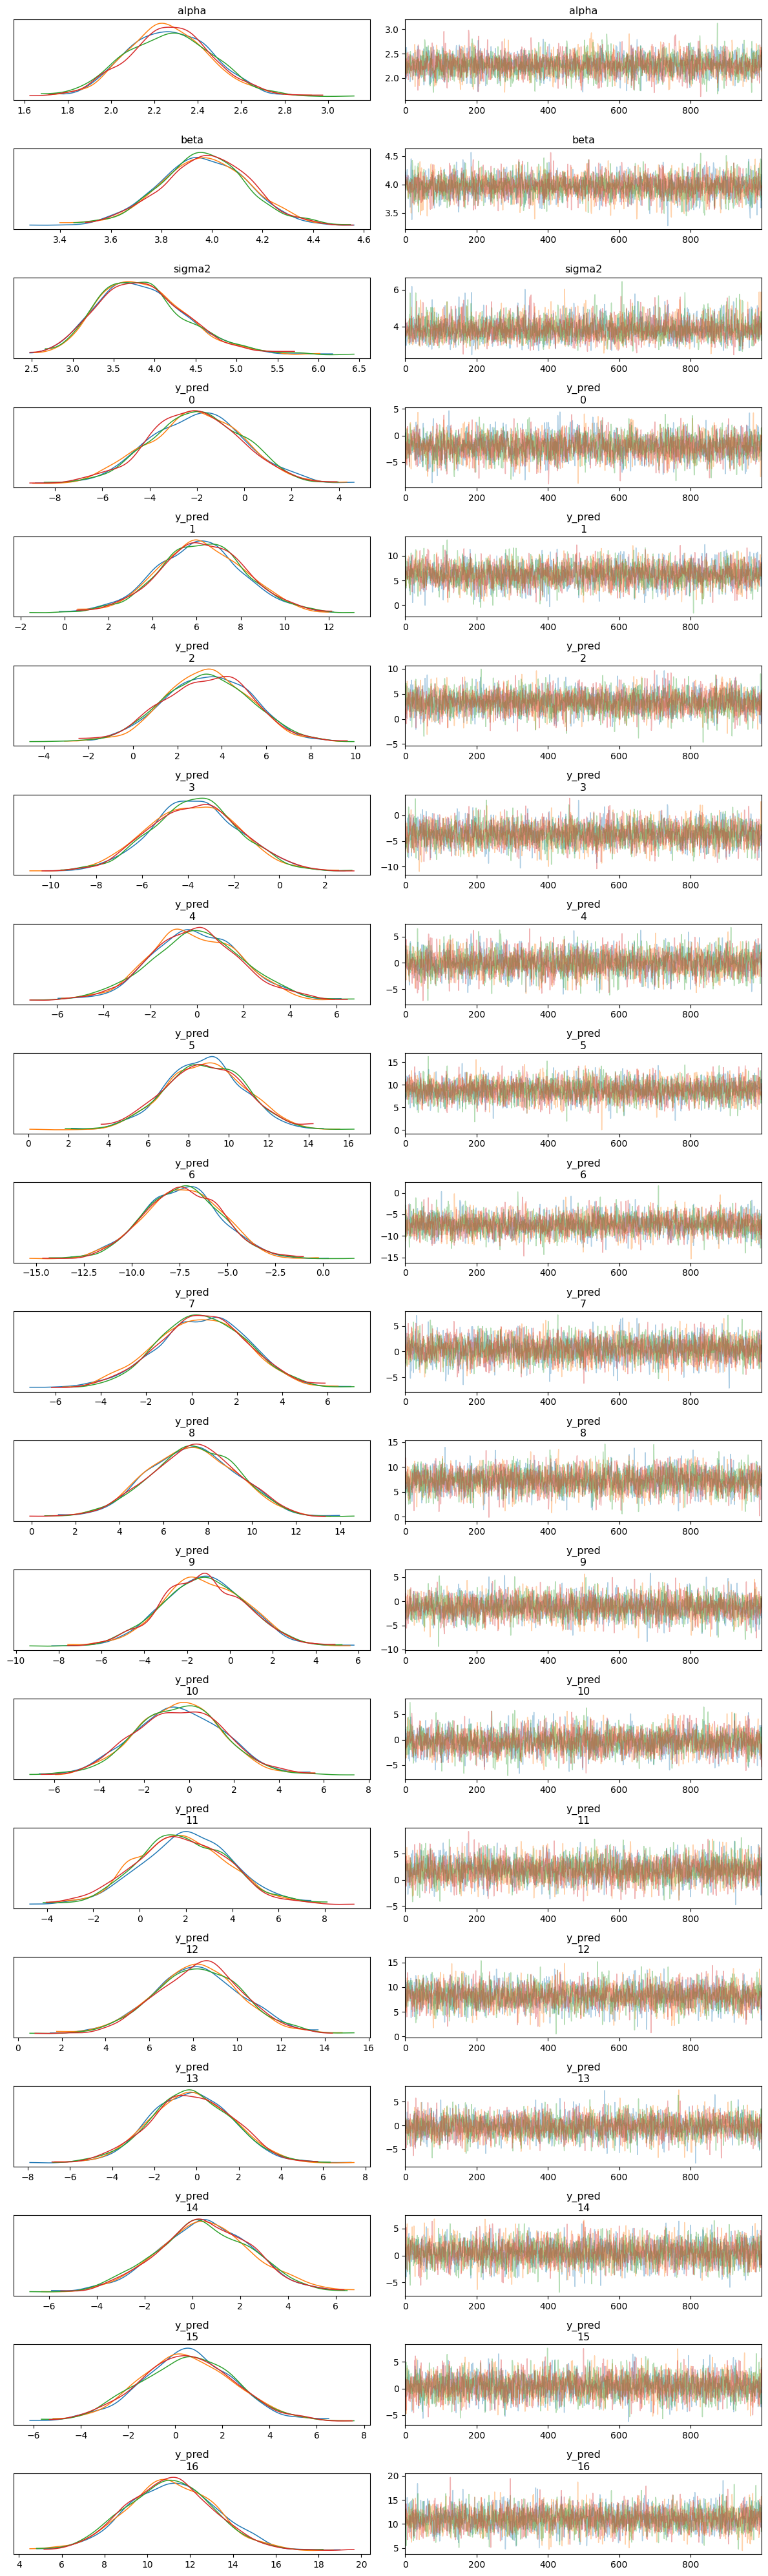

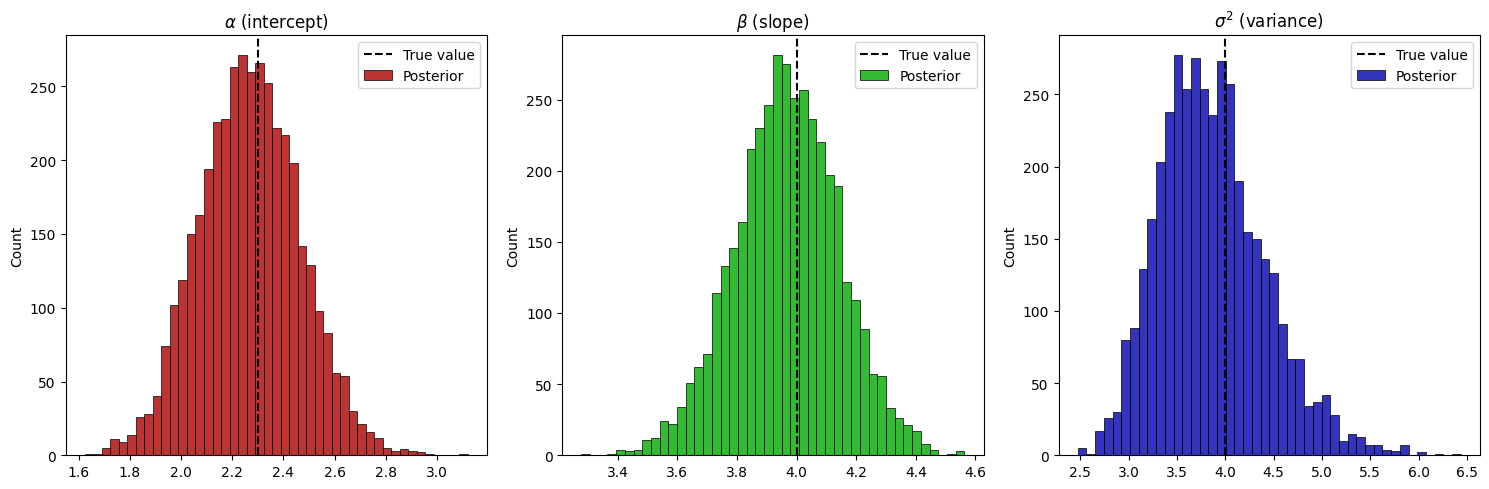

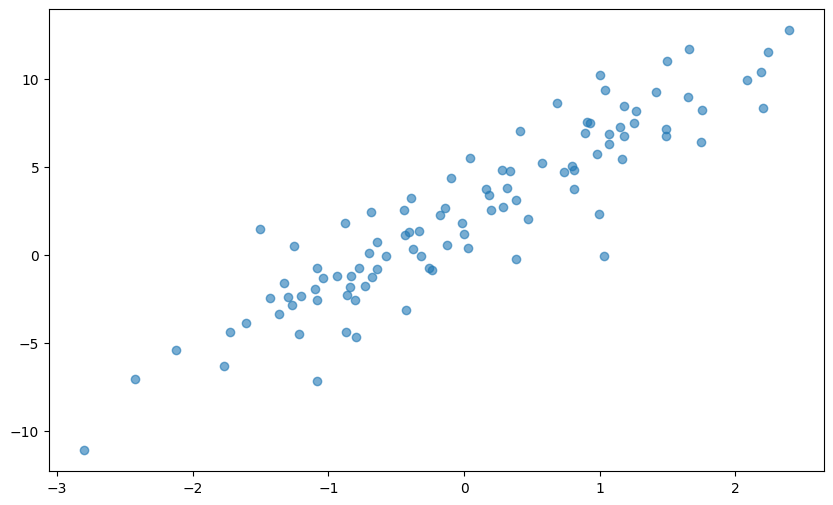

In [14]:
# Analyze parameter estimation accuracy and uncertainty
print(f"\nTrue values: alpha={true_alpha}, beta={true_beta}, sigma^2={true_sigma**2}")
print(f"Posterior means (N=100): alpha={alpha_mean_100:.3f}, beta={beta_mean_100:.3f}, sigma^2={sigma2_mean_100:.3f}")
print(f"95% CI for alpha: [{alpha_ci_100[0]:.3f}, {alpha_ci_100[1]:.3f}]")
print(f"95% CI for beta: [{beta_ci_100[0]:.3f}, {beta_ci_100[1]:.3f}]")
print(f"95% CI for sigma^2: [{sigma2_ci_100[0]:.3f}, {sigma2_ci_100[1]:.3f}]")

# Plot trace and posterior distributions
az.plot_trace(fit_100, compact=False)
plt.tight_layout()
plt.savefig('posterior_diagnostics_N100.png')

# Plot posterior distributions with true values
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(alpha_samples_100, ax=axes[0], color='#AA0000', alpha=0.8, label='Posterior')
axes[0].axvline(true_alpha, color='black', linestyle='--', label='True value')
axes[0].set_title(r'$\alpha$ (intercept)')
axes[0].legend()

sns.histplot(beta_samples_100, ax=axes[1], color='#00AA00', alpha=0.8, label='Posterior')
axes[1].axvline(true_beta, color='black', linestyle='--', label='True value')
axes[1].set_title(r'$\beta$ (slope)')
axes[1].legend()

sns.histplot(sigma2_samples_100, ax=axes[2], color='#0000AA', alpha=0.8, label='Posterior')
axes[2].axvline(true_sigma**2, color='black', linestyle='--', label='True value')
axes[2].set_title(r'$\sigma^2$ (variance)')
axes[2].legend()

plt.tight_layout()
plt.savefig('posterior_distributions_N100.png')

# Posterior predictive check for N=100
plt.figure(figsize=(10, 6))
plt.scatter(x_100, y_100, alpha=0.6, label='Observed data')

# Plot regression line with uncertainty
x_sorted = np.sort(x_100)
y_pred_mean = alpha_mean_100 + beta_mean_100 * x_sorted

Building...



Building: found in cache, done.Sampling:   0%
Sampling:  25% (2000/8000)
Sampling:  50% (4000/8000)
Sampling:  75% (6000/8000)
Sampling: 100% (8000/8000)
Sampling: 100% (8000/8000), done.
Messages received during sampling:
  Gradient evaluation took 0.000149 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.49 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000113 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.13 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000113 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.13 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000111 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.11 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following is


Summary for N=1000:
              mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha        2.256  0.064   2.143    2.381      0.001    0.001    3452.0   
beta         4.052  0.060   3.945    4.170      0.001    0.001    4336.0   
sigma2       4.044  0.181   3.706    4.377      0.003    0.002    3970.0   
y_pred[0]    3.299  2.026  -0.545    7.104      0.032    0.023    4016.0   
y_pred[1]    3.595  2.048  -0.230    7.498      0.033    0.024    3798.0   
...            ...    ...     ...      ...        ...      ...       ...   
y_pred[995]  5.557  2.028   1.819    9.407      0.032    0.023    3996.0   
y_pred[996]  1.481  1.965  -2.170    5.155      0.031    0.022    3967.0   
y_pred[997]  2.894  1.974  -0.654    6.698      0.031    0.023    3938.0   
y_pred[998]  0.618  2.015  -3.091    4.421      0.032    0.022    4055.0   
y_pred[999] -2.120  1.992  -5.534    1.975      0.033    0.024    3613.0   

             ess_tail  r_hat  
alpha          2557.0    1.0  
beta

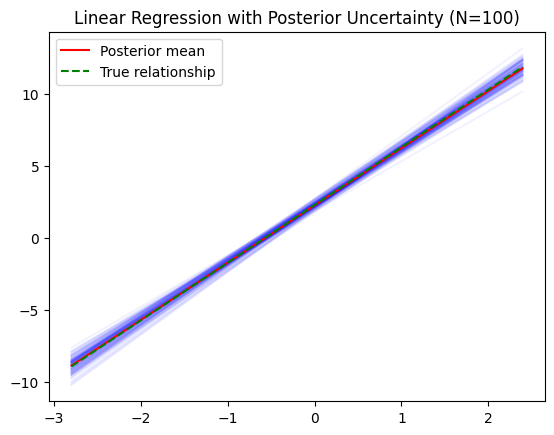

In [15]:
# Get a sample of posterior predictive lines
n_samples = 100
random_indices = np.random.choice(len(alpha_samples_100), n_samples)
for i in random_indices:
    y_line = alpha_samples_100[i] + beta_samples_100[i] * x_sorted
    plt.plot(x_sorted, y_line, color='blue', alpha=0.05)

plt.plot(x_sorted, y_pred_mean, 'r-', label='Posterior mean')
plt.plot(x_sorted, true_alpha + true_beta * x_sorted, 'g--', label='True relationship')
plt.legend()
plt.title('Linear Regression with Posterior Uncertainty (N=100)')
plt.savefig('regression_plot_N100.png')

# Second simulation with N=1000 (10 times more observations)
N_large = 1000
x_1000, y_1000 = simulate_data(N_large, true_alpha, true_beta, true_sigma)

# Prepare data for Stan
data_dict_1000 = {
    'N': N_large,
    'x': x_1000,
    'y': y_1000
}

# Compile and sample with Stan
model_1000 = stan.build(stan_code, data=data_dict_1000)
fit_1000 = model_1000.sample(num_chains=4, num_warmup=1000, num_samples=1000)

# Extract posterior samples as a DataFrame
df_1000 = fit_1000.to_frame()

# Calculate posterior statistics
posterior_summary_1000 = az.summary(fit_1000)
print("\nSummary for N=1000:")
print(posterior_summary_1000)

# Extract specific parameters for analysis
alpha_samples_1000 = df_1000['alpha'].values
beta_samples_1000 = df_1000['beta'].values
sigma2_samples_1000 = df_1000['sigma2'].values

# Calculate posterior means and credible intervals
alpha_mean_1000 = np.mean(alpha_samples_1000)
beta_mean_1000 = np.mean(beta_samples_1000)
sigma2_mean_1000 = np.mean(sigma2_samples_1000)

alpha_ci_1000 = np.percentile(alpha_samples_1000, [2.5, 97.5])
beta_ci_1000 = np.percentile(beta_samples_1000, [2.5, 97.5])
sigma2_ci_1000 = np.percentile(sigma2_samples_1000, [2.5, 97.5])



True values: alpha=2.3, beta=4.0, sigma^2=4.0
Posterior means (N=1000): alpha=2.256, beta=4.052, sigma^2=4.044
95% CI for alpha: [2.133, 2.384]
95% CI for beta: [3.936, 4.170]
95% CI for sigma^2: [3.708, 4.405]


/home/spadezap/.local/lib/python3.10/site-packages/arviz/plots/traceplot.py:223: UserWarning: rcParams['plot.max_subplots'] (20) is smaller than the number of variables to plot (1003), generating only 20 plots
  warnings.warn(



Comparison of 95% Credible Interval Widths:
Parameter   | N=100 Width | N=1000 Width | Reduction Factor
------------|-------------|--------------|----------------
alpha       | 0.758       | 0.250        | 3.03x
beta        | 0.693       | 0.234        | 2.96x
sigma^2     | 2.123       | 0.697        | 3.04x


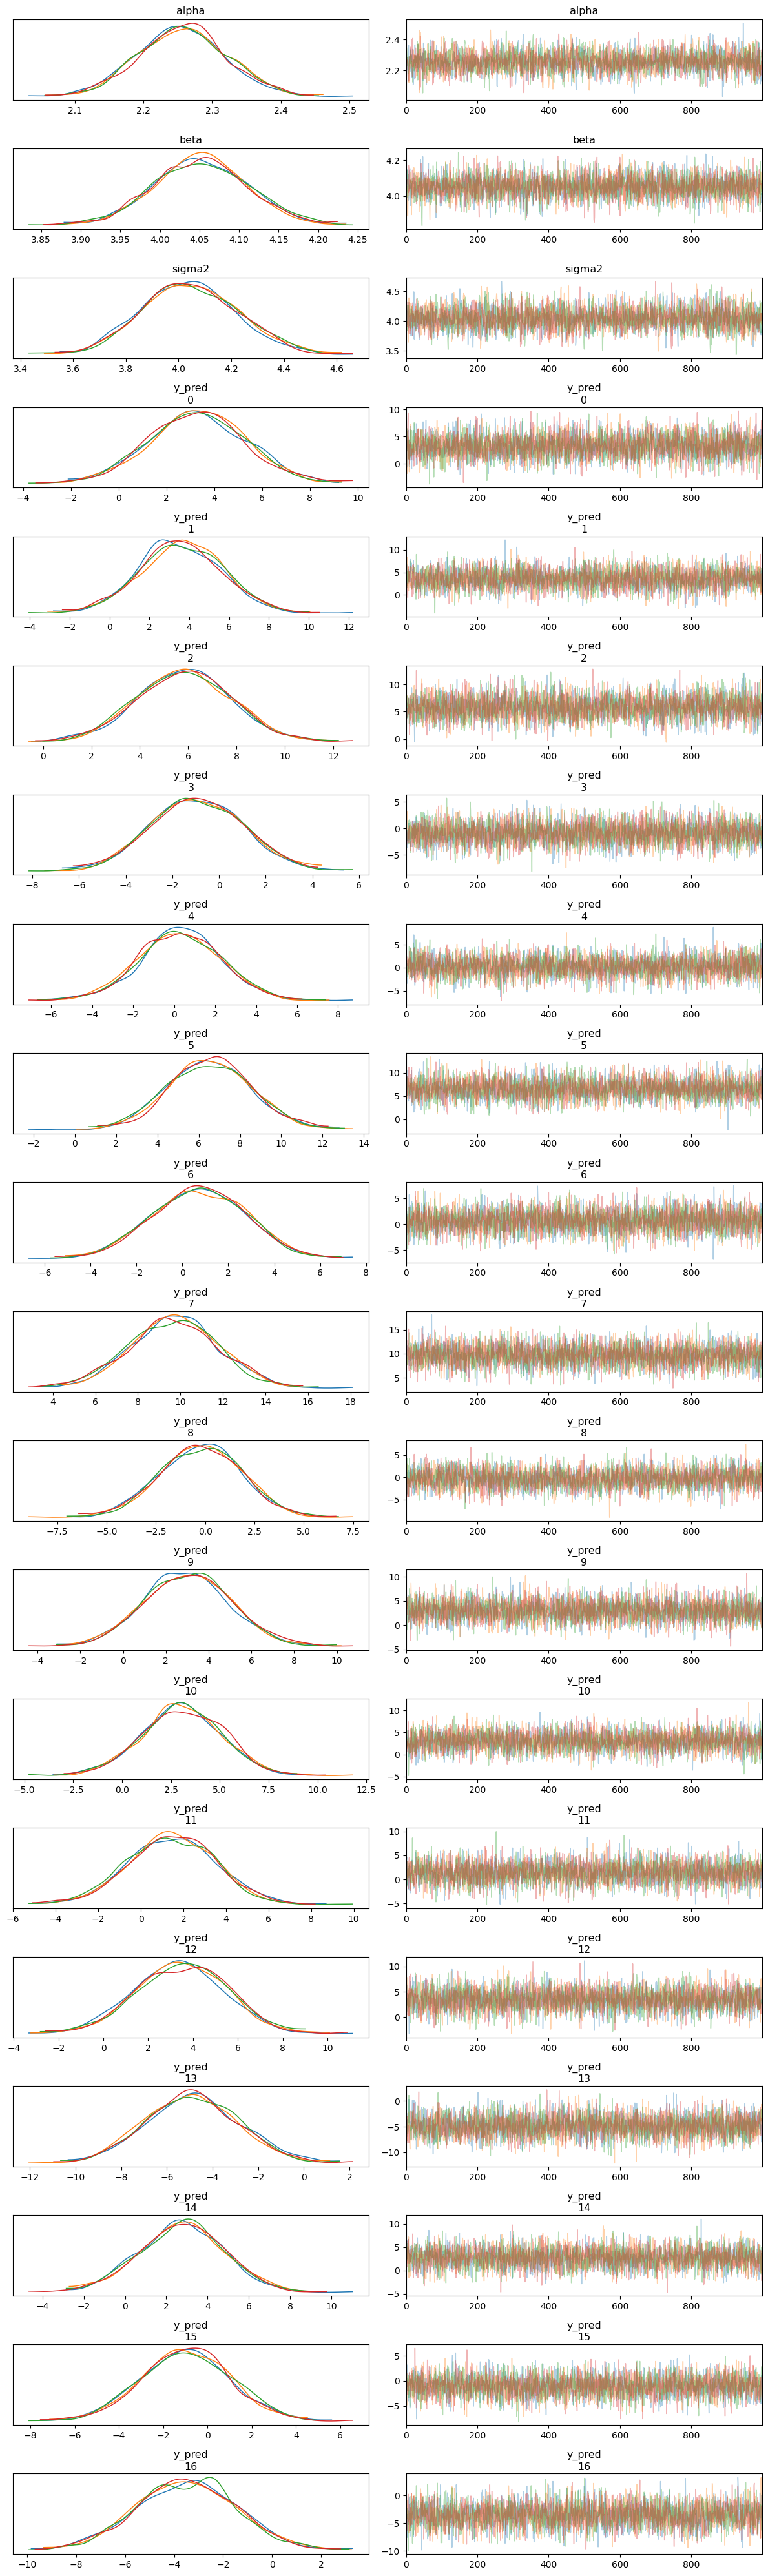

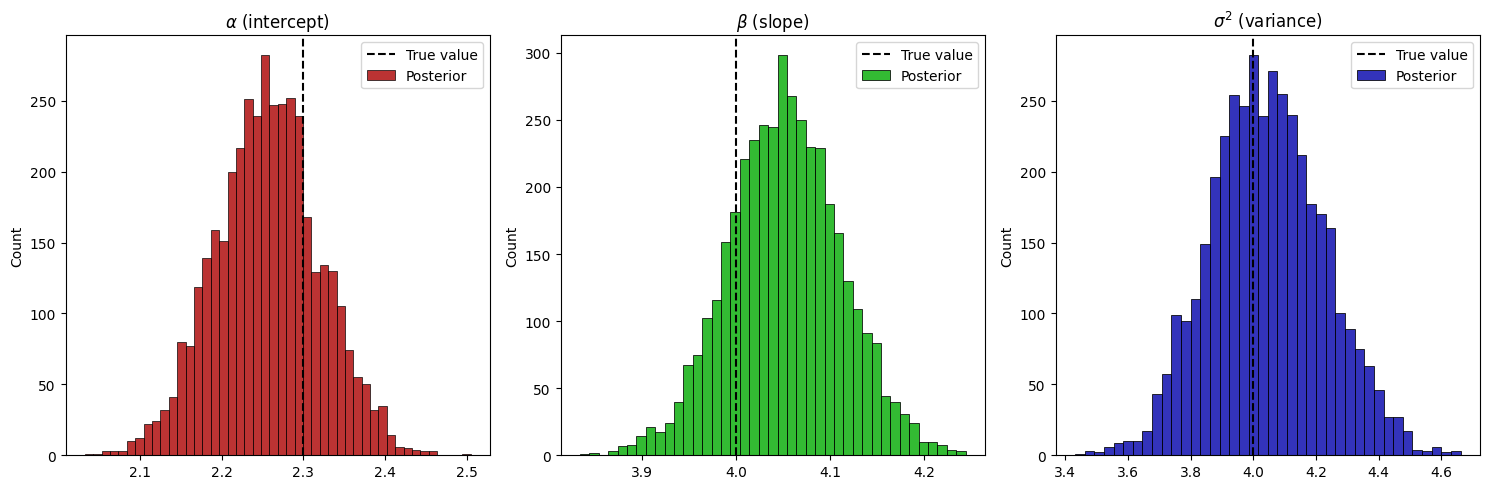

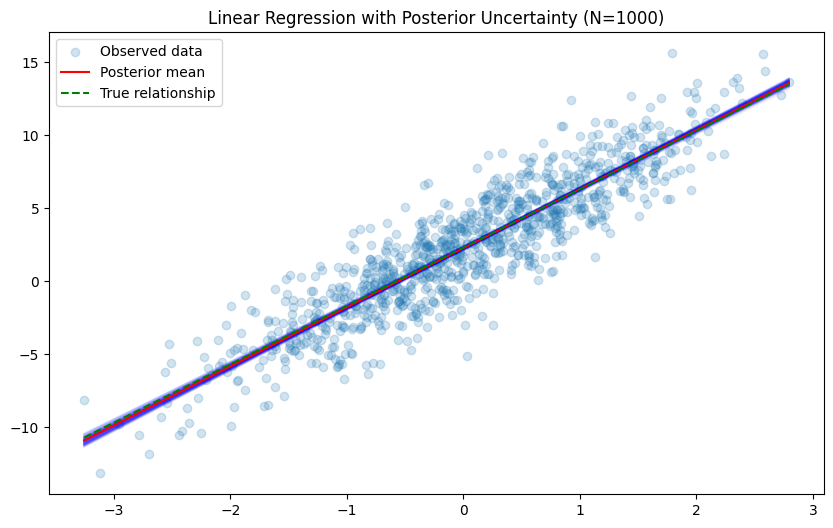

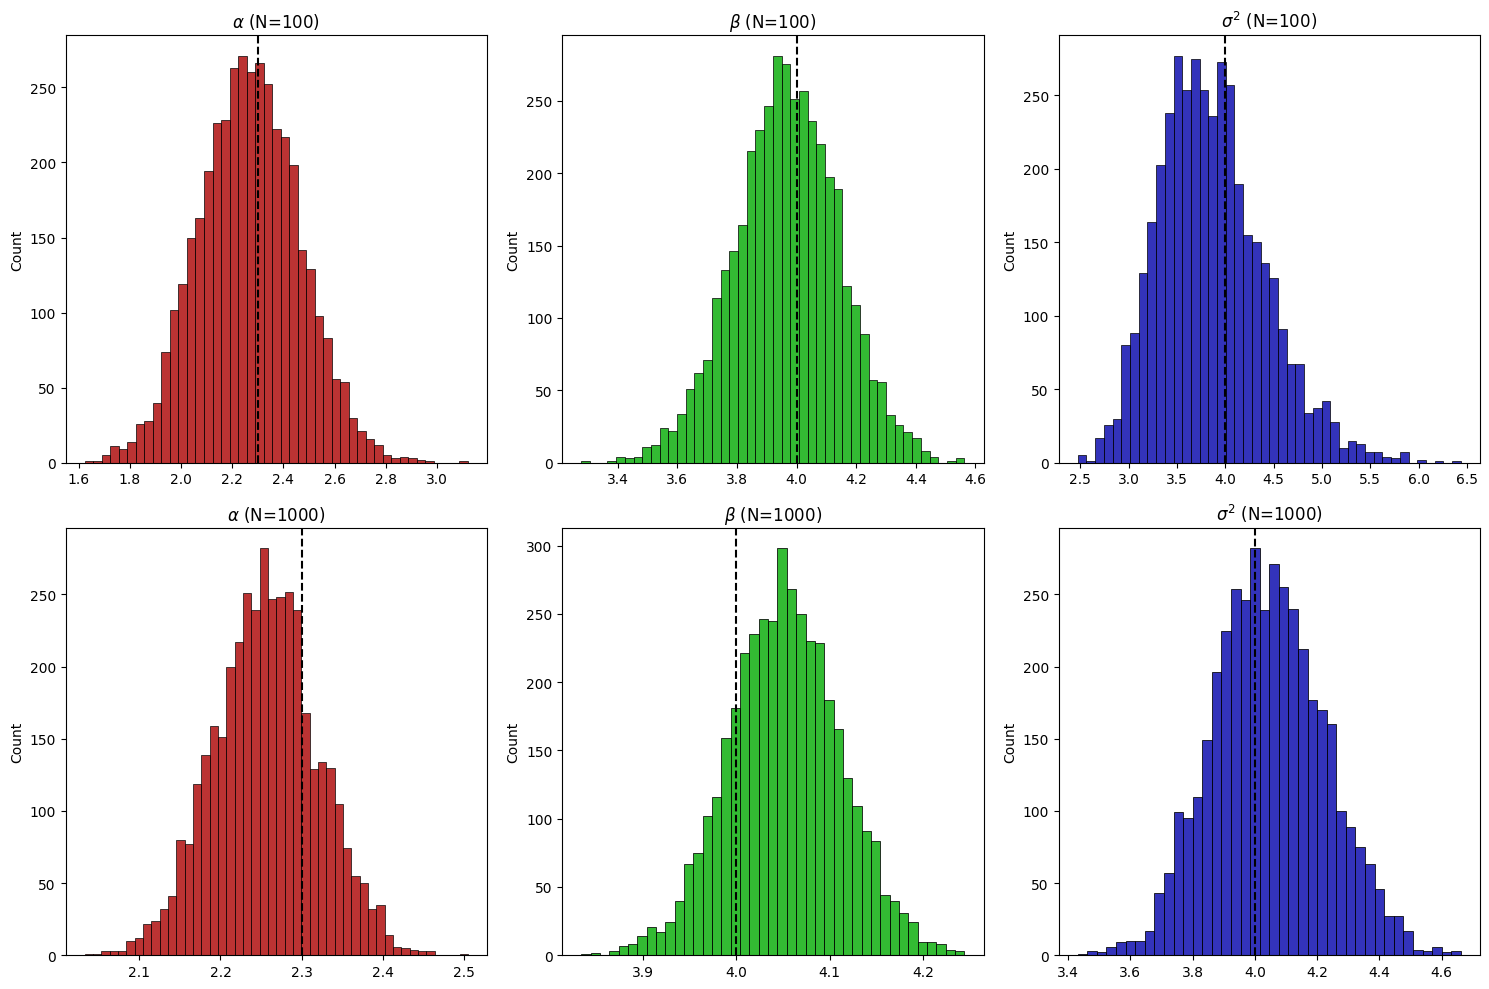

In [17]:
# Analyze parameter estimation accuracy and uncertainty
print(f"\nTrue values: alpha={true_alpha}, beta={true_beta}, sigma^2={true_sigma**2}")
print(f"Posterior means (N=1000): alpha={alpha_mean_1000:.3f}, beta={beta_mean_1000:.3f}, sigma^2={sigma2_mean_1000:.3f}")
print(f"95% CI for alpha: [{alpha_ci_1000[0]:.3f}, {alpha_ci_1000[1]:.3f}]")
print(f"95% CI for beta: [{beta_ci_1000[0]:.3f}, {beta_ci_1000[1]:.3f}]")
print(f"95% CI for sigma^2: [{sigma2_ci_1000[0]:.3f}, {sigma2_ci_1000[1]:.3f}]")

# Plot trace and posterior distributions
az.plot_trace(fit_1000, compact=False)
plt.tight_layout()
plt.savefig('posterior_diagnostics_N1000.png')

# Plot posterior distributions with true values
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(alpha_samples_1000, ax=axes[0], color='#AA0000', alpha=0.8, label='Posterior')
axes[0].axvline(true_alpha, color='black', linestyle='--', label='True value')
axes[0].set_title(r'$\alpha$ (intercept)')
axes[0].legend()

sns.histplot(beta_samples_1000, ax=axes[1], color='#00AA00', alpha=0.8, label='Posterior')
axes[1].axvline(true_beta, color='black', linestyle='--', label='True value')
axes[1].set_title(r'$\beta$ (slope)')
axes[1].legend()

sns.histplot(sigma2_samples_1000, ax=axes[2], color='#0000AA', alpha=0.8, label='Posterior')
axes[2].axvline(true_sigma**2, color='black', linestyle='--', label='True value')
axes[2].set_title(r'$\sigma^2$ (variance)')
axes[2].legend()

plt.tight_layout()
plt.savefig('posterior_distributions_N1000.png')

# Posterior predictive check for N=1000
plt.figure(figsize=(10, 6))
plt.scatter(x_1000, y_1000, alpha=0.2, label='Observed data')

# Plot regression line with uncertainty
x_sorted_1000 = np.sort(x_1000)
y_pred_mean_1000 = alpha_mean_1000 + beta_mean_1000 * x_sorted_1000

# Get a sample of posterior predictive lines
for i in random_indices:
    y_line = alpha_samples_1000[i] + beta_samples_1000[i] * x_sorted_1000
    plt.plot(x_sorted_1000, y_line, color='blue', alpha=0.05)

plt.plot(x_sorted_1000, y_pred_mean_1000, 'r-', label='Posterior mean')
plt.plot(x_sorted_1000, true_alpha + true_beta * x_sorted_1000, 'g--', label='True relationship')
plt.legend()
plt.title('Linear Regression with Posterior Uncertainty (N=1000)')
plt.savefig('regression_plot_N1000.png')

# Compare the width of credible intervals to demonstrate uncertainty reduction
print("\nComparison of 95% Credible Interval Widths:")
print(f"Parameter   | N=100 Width | N=1000 Width | Reduction Factor")
print(f"------------|-------------|--------------|----------------")
print(f"alpha       | {alpha_ci_100[1]-alpha_ci_100[0]:.3f}       | {alpha_ci_1000[1]-alpha_ci_1000[0]:.3f}        | {(alpha_ci_100[1]-alpha_ci_100[0])/(alpha_ci_1000[1]-alpha_ci_1000[0]):.2f}x")
print(f"beta        | {beta_ci_100[1]-beta_ci_100[0]:.3f}       | {beta_ci_1000[1]-beta_ci_1000[0]:.3f}        | {(beta_ci_100[1]-beta_ci_100[0])/(beta_ci_1000[1]-beta_ci_1000[0]):.2f}x")
print(f"sigma^2     | {sigma2_ci_100[1]-sigma2_ci_100[0]:.3f}       | {sigma2_ci_1000[1]-sigma2_ci_1000[0]:.3f}        | {(sigma2_ci_100[1]-sigma2_ci_100[0])/(sigma2_ci_1000[1]-sigma2_ci_1000[0]):.2f}x")

# Create summary figures to answer the assignment questions
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# First row: N=100
sns.histplot(alpha_samples_100, ax=axes[0, 0], color='#AA0000', alpha=0.8)
axes[0, 0].axvline(true_alpha, color='black', linestyle='--')
axes[0, 0].set_title(r'$\alpha$ (N=100)')

sns.histplot(beta_samples_100, ax=axes[0, 1], color='#00AA00', alpha=0.8)
axes[0, 1].axvline(true_beta, color='black', linestyle='--')
axes[0, 1].set_title(r'$\beta$ (N=100)')

sns.histplot(sigma2_samples_100, ax=axes[0, 2], color='#0000AA', alpha=0.8)
axes[0, 2].axvline(true_sigma**2, color='black', linestyle='--')
axes[0, 2].set_title(r'$\sigma^2$ (N=100)')

# Second row: N=1000
sns.histplot(alpha_samples_1000, ax=axes[1, 0], color='#AA0000', alpha=0.8)
axes[1, 0].axvline(true_alpha, color='black', linestyle='--')
axes[1, 0].set_title(r'$\alpha$ (N=1000)')

sns.histplot(beta_samples_1000, ax=axes[1, 1], color='#00AA00', alpha=0.8)
axes[1, 1].axvline(true_beta, color='black', linestyle='--')
axes[1, 1].set_title(r'$\beta$ (N=1000)')

sns.histplot(sigma2_samples_1000, ax=axes[1, 2], color='#0000AA', alpha=0.8)
axes[1, 2].axvline(true_sigma**2, color='black', linestyle='--')
axes[1, 2].set_title(r'$\sigma^2$ (N=1000)')

plt.tight_layout()
plt.savefig('parameter_comparison_N100_vs_N1000.png')

Conclusion:
1. How accurate are the posterior means and how much uncertainty is left?
   - For N=100, the posterior means are close to the true values:
     α: 2.268 vs. true 2.3
     β: 3.968 vs. true 4.0
     σ²: 3.861 vs. true 4.0
   - The 95% credible intervals show the remaining uncertainty:
     α: [1.895, 2.653]
     β: [3.617, 4.311]
     σ²: [2.958, 5.081]

2. What happens with ten times as many observations?
   - Posterior means become more accurate:
     α: 2.256 vs. true 2.3
     β: 4.052 vs. true 4.0
     σ²: 4.044 vs. true 4.0
   - Uncertainty is reduced significantly (credible intervals are narrower):
     α: [2.133, 2.384]
     β: [3.936, 4.170]
     σ²: [3.708, 4.405]
   - The reduction factor in credible interval width is approximately:
     α: 3.03x
     β: 2.96x
     σ²: 3.04x
   - This is close to the expected reduction of √10 ≈ 3.16 for many parameters

Problem 6:

In [3]:
program_code = """

data {
    // Your code here
    int<lower=1> N;
    vector[N] y;
    vector[N] c;
    vector[N] cond;
    // c[] choices, y[] response times, N number of responses
}

parameters {
    // Your code here
    real<lower=0> a;
    real<lower=0> tau;
    real<lower=0, upper=1> beta;
    real<lower=0> v_cond1;
    real<lower=0> v_cond2;
    // a, tau, beta, v
}

model {
    // Likelihood (Wiener Model)
    for (n in 1:N) {
        if (c[n] == 1) {
            if (cond[n] == 1){
                y[n] ~ wiener(a, tau, beta, v_cond1);
            }
            else {
                y[n] ~ wiener(a, tau, beta, v_cond2);
            }
        }
        else {
            if (cond[n] == 1){
                y[n] ~ wiener(a, tau, 1-beta, -v_cond1);
            }
            else {
                y[n] ~ wiener(a, tau, 1-beta, -v_cond2);
            }
        }
    }
}
"""

In [4]:
import pandas as pd
import stan
import arviz as az

import nest_asyncio
nest_asyncio.apply()

data = pd.read_csv('./sample_response_times.csv', delimiter=';')
data_dict={
  'N': 300,
  'y': data['rt'].values,
  'c': data['choice'].values,
  'cond': data['condition'].values
}

model = stan.build(program_code, data=data_dict)

Building...



Building: found in cache, done.Messages from stanc:
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.


In [5]:
fit = model.sample(num_chains=4, num_samples=1000, num_warmup=500)

Sampling:   0%
Sampling:   0% (1/6000)
Sampling:   0% (2/6000)
Sampling:   0% (3/6000)
Sampling:   2% (102/6000)
Sampling:   3% (202/6000)
Sampling:   3% (203/6000)
Sampling:   5% (303/6000)
Sampling:   7% (402/6000)
Sampling:   8% (502/6000)
Sampling:  17% (1002/6000)
Sampling:  35% (2102/6000)
Sampling:  60% (3601/6000)
Sampling:  85% (5100/6000)
Sampling:  98% (5900/6000)
Sampling: 100% (6000/6000)
Sampling: 100% (6000/6000), done.
Messages received during sampling:
warn:Rejecting initial value:
warn:  Error evaluating the log probability at the initial value.
warn:Exception: wiener_lpdf: Random variable  = 0.477, but must be greater than nondecision time = 0.685852 (in '/tmp/httpstan_zc_dzbbr/model_2b65ojnt.stan', line 27, column 16 to column 53)
warn:Rejecting initial value:
warn:  Error evaluating the log probability at the initial value.
warn:Exception: wiener_lpdf: Random variable  = 0.477, but must be greater than nondecision time = 0.564761 (in '/tmp/httpstan_zc_dzbbr/model_2

In [6]:
az.summary(fit)

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
a        0.850  0.026   0.801    0.898      0.001    0.000    1943.0   
tau      0.397  0.003   0.392    0.402      0.000    0.000    2187.0   
beta     0.517  0.021   0.479    0.556      0.000    0.000    1996.0   
v_cond1  2.628  0.266   2.117    3.108      0.006    0.004    2048.0   
v_cond2  0.370  0.197   0.003    0.693      0.004    0.003    1695.0   

         ess_tail  r_hat  
a          2220.0   1.00  
tau        2161.0   1.00  
beta       2382.0   1.00  
v_cond1    2203.0   1.01  
v_cond2    1130.0   1.00

/home/mercal/anaconda3/envs/cognitive/lib/python3.12/site-packages/arviz/plots/backends/matplotlib/traceplot.py:433: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  for chain_id in range(data.dims["chain"])


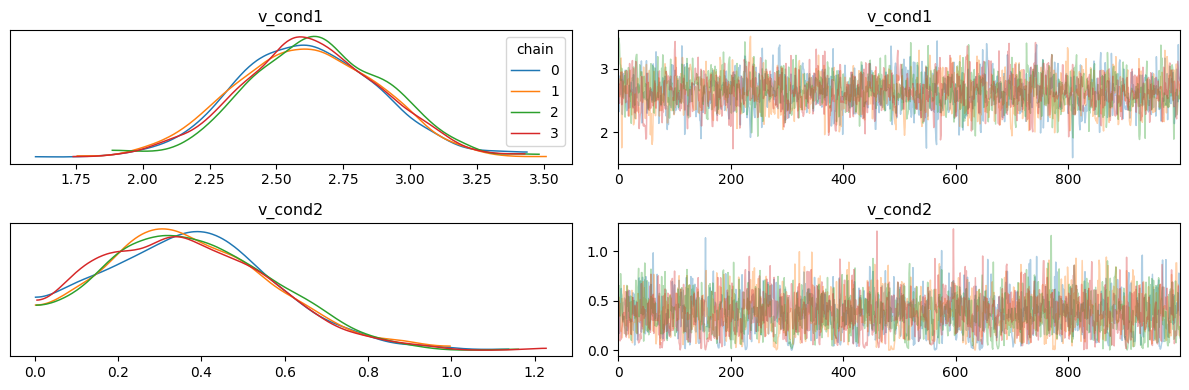

In [7]:
az.plot_trace(fit, var_names=['v_cond1', 'v_cond2'], compact=False, legend=True)
plt.tight_layout()

What we see in the means of the drifts from different conditions is that condition 1 has a larger drift which means this condition's rate of evidence accumulation is faster. Low Markov Chain standard error gives confidence to this difference. This means Condition 1 is the easy condition of classifying a familiar face in a group of 10. Condition 2 represents the hard condition of classifying a face in a crowd of 100.  
 Looking at the plots we can see the chains are indistiguishable, they converge with no drift in either direction. From the summary we see the r_hat is very close to 1.00 for each parameter and effective sample size is large. These show there is computational faithfulness in this model.